# HR Data Analysis – Who’s Likely to Quit? 


Employee retention is critical for organizational success. Understanding which employees are at risk of quitting enables proactive engagement, reducing turnover costs and preserving talent. In this project focuses on predicting which employees are most likely to quit by using historical employee data. With this information, the company can take action early to keep the employees from leaving. 

Here will first understand before going to the topic, what is employee attrition? 
Employee attrition refers to the natural reduction in workforce that occurs when employees leave an organization and are not immediately replaced. This includes voluntary departures (resignations, retirements) and involuntary separations (layoffs, terminations). Understanding and predicting attrition patterns has become crucial for modern organizations. 

Objective: The objective of this project is to analyze HR data to identify patterns and factors that correlate with employee attrition. This will help HR prioritize retention strategies, reduce hiring costs, and maintain workforce stability by predicting who is likely to quit.

# Part 1: Data Generation (Python)

### Let's generate a synthetic dataset simulating HR employee data, including factors that might influence attrition.

In [2]:
import pandas as pd
import numpy as np
import random

# Set a seed for reproducibility
np.random.seed(50)
random.seed(50)

# Define parameters for data generation
num_employees = 2000

departments = ['Sales', 'HR', 'IT', 'Marketing', 'Finance', 'Operations', 'R&D']
job_roles = {
    'Sales': ['Sales Executive', 'Sales Manager'],
    'HR': ['HR Generalist', 'HR Manager'],
    'IT': ['Software Engineer', 'DevOps Engineer', 'Data Scientist', 'IT Manager'],
    'Marketing': ['Marketing Specialist', 'Content Creator'],
    'Finance': ['Accountant', 'Financial Analyst'],
    'Operations': ['Operations Associate', 'Logistics Manager'],
    'R&D': ['Research Scientist', 'Product Developer']
}
education_levels = ['High School', 'Bachelors', 'Masters', 'PhD']
gender = ['Male', 'Female', 'Other']
performance_ratings = [1, 2, 3, 4, 5] # 1: Poor, 5: Excellent

data = []
for i in range(num_employees):
    employee_id = f'EMP{i:04d}'
    age = random.randint(22, 60)
    
    dept = random.choice(departments)
    role = random.choice(job_roles[dept])
    
    edu = random.choice(education_levels)
    gen = random.choice(gender)
    
    # Tenure in years
    tenure_years = random.randint(0, age - 20) # Ensure tenure is less than age
    
    # Monthly Income - base + role/dept factor
    base_income = random.uniform(30000, 150000)
    if dept == 'IT': base_income *= 1.5
    if role in ['Manager', 'Director']: base_income *= 1.8
    monthly_income = int(base_income + random.uniform(-10000, 10000))
    
    # Job Satisfaction (1-5, 5 highest)
    job_satisfaction = random.randint(1, 5)
    
    # Work-Life Balance (1-5, 5 best)
    work_life_balance = random.randint(1, 5)
    
    # Overtime (hours per month)
    overtime_hours = random.randint(0, 40)
    if random.random() < 0.2: # 20% chance of higher overtime
        overtime_hours = random.randint(40, 80)
    
    # Performance Rating
    performance = random.choice(performance_ratings)
    
    # Attrition (True/False) - introduce correlations
    attrition = False
    
    # Factors increasing attrition likelihood:
    if job_satisfaction < 3:
        if random.random() < 0.6: attrition = True # High chance if low satisfaction
    if work_life_balance < 3:
        if random.random() < 0.5: attrition = True # High chance if poor WLB
    if overtime_hours > 40:
        if random.random() < 0.4: attrition = True # Increased chance with high overtime
    if performance < 3:
        if random.random() < 0.3: attrition = True # Some chance if low performance
    if monthly_income < 50000 and tenure_years < 2:
        if random.random() < 0.2: attrition = True # Junior, low pay
    
    # Factors decreasing attrition likelihood:
    if job_satisfaction > 4 and work_life_balance > 4:
        if random.random() < 0.1: attrition = False # Override if very happy
    if monthly_income > 150000 and tenure_years > 5:
        if random.random() < 0.1: attrition = False # Override if senior, high pay

    data.append([
        employee_id, age, gen, dept, role, edu, tenure_years,
        monthly_income, job_satisfaction, work_life_balance,
        overtime_hours, performance, attrition
    ])

df = pd.DataFrame(data, columns=[
    'employee_id', 'age', 'gender', 'department', 'job_role', 'education_level', 'tenure_years',
    'monthly_income', 'job_satisfaction', 'work_life_balance',
    'overtime_hours', 'performance_rating', 'attrition'
])

# Display basic info and head
print("Generated Data Info:")
print(df.info())
print("\nGenerated Data Head:")
print(df.head())

# Save the dataset to a CSV file
df.to_csv('hr_data.csv', index=False)
print("\nDataset 'hr_data.csv' generated successfully!")

Generated Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   employee_id         2000 non-null   object
 1   age                 2000 non-null   int64 
 2   gender              2000 non-null   object
 3   department          2000 non-null   object
 4   job_role            2000 non-null   object
 5   education_level     2000 non-null   object
 6   tenure_years        2000 non-null   int64 
 7   monthly_income      2000 non-null   int64 
 8   job_satisfaction    2000 non-null   int64 
 9   work_life_balance   2000 non-null   int64 
 10  overtime_hours      2000 non-null   int64 
 11  performance_rating  2000 non-null   int64 
 12  attrition           2000 non-null   bool  
dtypes: bool(1), int64(7), object(5)
memory usage: 189.6+ KB
None

Generated Data Head:
  employee_id  age  gender  department              job_role edu

# Part 2: Data Science Tasks for Students

### Task 1: Data Loading & Initial Exploration

In this part, want to Open the CSV file we created, Take a first look at the data, Understand what columns we have, Check if anything is missing or strange. This is called Exploratory Data Analysis (EDA), the very first step in any real-world Data Science project.

In [4]:
import pandas as pd
df = pd.read_csv("hr_data.csv")    #load the csv files

In [5]:
print(df.head())   #first 5 rows

  employee_id  age  gender  department              job_role education_level  \
0     EMP0000   53   Other         R&D     Product Developer         Masters   
1     EMP0001   31  Female          IT     Software Engineer         Masters   
2     EMP0002   26    Male  Operations     Logistics Manager             PhD   
3     EMP0003   59   Other   Marketing  Marketing Specialist         Masters   
4     EMP0004   55   Other         R&D    Research Scientist             PhD   

   tenure_years  monthly_income  job_satisfaction  work_life_balance  \
0            15          118443                 3                  1   
1             3           88461                 3                  5   
2             1           76469                 4                  1   
3            13           86550                 5                  1   
4            33           73211                 5                  2   

   overtime_hours  performance_rating  attrition  
0              34                  

In [6]:
print(df.info())   #checking the info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   employee_id         2000 non-null   object
 1   age                 2000 non-null   int64 
 2   gender              2000 non-null   object
 3   department          2000 non-null   object
 4   job_role            2000 non-null   object
 5   education_level     2000 non-null   object
 6   tenure_years        2000 non-null   int64 
 7   monthly_income      2000 non-null   int64 
 8   job_satisfaction    2000 non-null   int64 
 9   work_life_balance   2000 non-null   int64 
 10  overtime_hours      2000 non-null   int64 
 11  performance_rating  2000 non-null   int64 
 12  attrition           2000 non-null   bool  
dtypes: bool(1), int64(7), object(5)
memory usage: 189.6+ KB
None


This shows Columns and data types (like numbers, strings), Number of non-missing values, Memory used

In [7]:
#We want to know how many employees (rows) and how many details (columns).

print(f"Rows:{df.shape[0]}")
print(f"Columns:{df.shape[1]}")

Rows:2000
Columns:13


In [8]:
#This shows statistics like: Mean, min/max, satndard deviation, we use this to understand the range and distribution of numbers.

print(df.describe())   

               age  tenure_years  monthly_income  job_satisfaction  \
count  2000.000000   2000.000000     2000.000000       2000.000000   
mean     41.304500     10.805500    96413.151000          3.024500   
std      11.208461      9.198694    39693.046375          1.412762   
min      22.000000      0.000000    21254.000000          1.000000   
25%      31.000000      3.000000    64228.500000          2.000000   
50%      41.000000      8.000000    94653.500000          3.000000   
75%      51.000000     16.250000   125312.500000          4.000000   
max      60.000000     39.000000   228636.000000          5.000000   

       work_life_balance  overtime_hours  performance_rating  
count        2000.000000      2000.00000         2000.000000  
mean            3.004500        27.40350            2.969500  
std             1.408002        19.20982            1.424986  
min             1.000000         0.00000            1.000000  
25%             2.000000        12.00000            2.

In [10]:
#Here we check if any data is missing (empty). This is very important before we analyze or model data.

print(df.isnull().sum())

employee_id           0
age                   0
gender                0
department            0
job_role              0
education_level       0
tenure_years          0
monthly_income        0
job_satisfaction      0
work_life_balance     0
overtime_hours        0
performance_rating    0
attrition             0
dtype: int64


##### In Part 2,Task 1, I performed initial data exploration using Pandas. I loaded the dataset, displayed the first few rows, and used methods like info(), describe(), and isnull().sum() to understand the structure and content of the data. I confirmed there were 2000 rows, 13 columns, and no missing values. This helped me verify that the dataset was clean and ready for further analysis.

### Task 2: Data Cleaning & Preparation

This part is very important, because clean data is the foundation of any successful data analysis or machine learning model.
To prepare your data for analysis and modeling by, Fixing missing data, Converting data to the right types, Handling outliers, Preparing categorical features.

#### Step 1: Handle Missing Values

In [12]:
# Check for missing values
df.isnull().sum()
print(df.isnull().sum())

employee_id           0
age                   0
gender                0
department            0
job_role              0
education_level       0
tenure_years          0
monthly_income        0
job_satisfaction      0
work_life_balance     0
overtime_hours        0
performance_rating    0
attrition             0
dtype: int64


We check if any column has missing (NaN) values. If present, we decide how to handle them, Drop them or Fill with mean/median/mode.

I checked for missing values using isnull().sum(). There were no missing values found in the dataset. If any were present, we would handle them by using appropriate techniques like filling with median/mode or dropping rows if needed.

#### Step 2: Data Type Conversion

# Convert 'attrition' to boolean

df['attrition'] = df['attrition'].astype(bool)

categorical_cols = ['gender', 'department', 'job_role', 'education_level', 
                    'performance_rating', 'job_satisfaction', 'work_life_balance']
for col in categorical_cols:
    df[col] = df[col].astype('category')

We converted the attrition column to boolean type and ensured all categorical variables like gender, department, and education_level were set to category dtype. This helps with memory efficiency and improves performance in modeling.

In [16]:
print(df.columns)

Index(['employee_id', 'age', 'gender', 'department', 'job_role',
       'education_level', 'tenure_years', 'monthly_income', 'job_satisfaction',
       'work_life_balance', 'overtime_hours', 'performance_rating',
       'attrition'],
      dtype='object')


#### Step 3: Outlier Detection

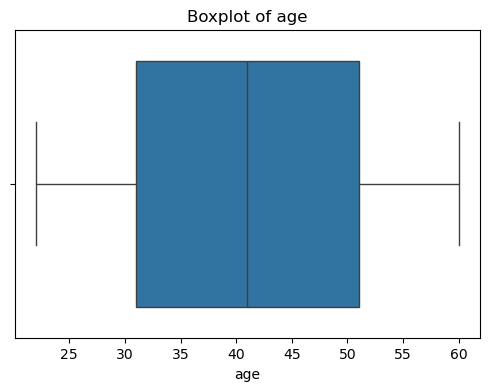

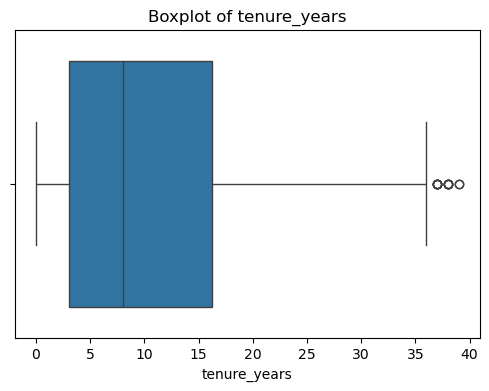

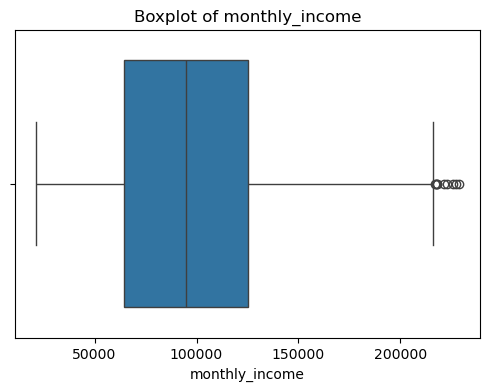

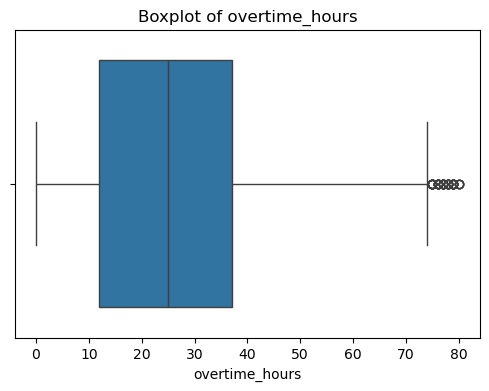

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplots to visualize outliers
numerical_cols = ['age', 'tenure_years', 'monthly_income', 'overtime_hours']

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

We use boxplots to see if there are any extreme values (outliers) in numeric columns. Outliers are values that are too high or too low compared to most data.Common technique to detect them: IQR (Interquartile Range)

In [21]:
# Example: Detecting outliers in monthly_income

Q1 = df['monthly_income'].quantile(0.25)
Q3 = df['monthly_income'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Get outliers

outliers = df[(df['monthly_income'] < lower_bound) | (df['monthly_income'] > upper_bound)]
print(f"Number of outliers in monthly_income: {outliers.shape[0]}")

Number of outliers in monthly_income: 9


We explored outliers using boxplots for numeric fields like age, monthly_income, tenure_years, and overtime_hours. Some high outliers were found in monthly income and overtime. Depending on the modeling approach, we may keep them, cap them, or remove them if they skew the results.

#### Step 4: Categorical Variable Handling

In [23]:
# Check categorical column types again

print(df[categorical_cols].dtypes)

gender                category
department            category
job_role              category
education_level       category
performance_rating    category
job_satisfaction      category
work_life_balance     category
dtype: object


We ensured that all relevant categorical columns were converted to category dtype. This makes the data more structured and ready for visualizations or machine learning preprocessing like encoding.

##### In Part 2, Task 2, the data cleaning phase, I first checked for missing values and found none. I then made sure each column had the correct data type — like setting attrition as boolean and converting categorical features like gender and department to category type. I also explored outliers using boxplots for features like income and overtime hours. This helped me understand data quality and prepare the dataset for modeling.

### Task 3: Feature Engineering

In this task 3, We want to create new columns from existing ones, making the data easier to analyze and more useful for modeling.

##### 1. tenure_buckets

We will take the tenure_years column (how many years the person worked) and group it into categories like:
0–2 years → New
3–5 years → Early
6–10 years → Experienced
10+ years → Senior

In [24]:
def bucket_tenure(years):
    if years <= 2:
        return '0-2 years'
    elif years <= 5:
        return '3-5 years'
    elif years <= 10:
        return '6-10 years'
    else:
        return '10+ years'

df['tenure_buckets'] = df['tenure_years'].apply(bucket_tenure)

##### 2. income_bins

We will divide employees into income groups based on their monthly_income:
Below 60,000 → Low
60,000–120,000 → Medium
Above 120,000 → High

In [26]:
def income_bucket(income):
    if income < 60000:
        return 'Low'
    elif income <= 120000:
        return 'Medium'
    else:
        return 'High'

df['income_bins'] = df['monthly_income'].apply(income_bucket)

##### 3. satisfaction_level

job_satisfaction is a number from 1 to 5. We will convert it into:
1–2 → Low
3 → Medium
4–5 → High

In [32]:
def satisfaction_level(score):
    if score <= 2:
        return 'Low'
    elif score == 3:
        return 'Medium'
    else:
        return 'High'

df['satisfaction_level'] = df['job_satisfaction'].apply(satisfaction_level)

##### 4. overtime_status

We’ll convert overtime_hours into buckets:
0 → None
1–20 → Low
21–40 → Medium
41+ → High

In [31]:
def categorize_overtime(hours):
    if hours == 0:
        return 'None'
    elif hours <= 20:
        return 'Low'
    elif hours <= 40:
        return 'Medium'
    else:
        return 'High'

df['overtime_status'] = df['overtime_hours'].apply(categorize_overtime)

In [36]:
print(df[['tenure_years', 'tenure_buckets',
          'monthly_income', 'income_bins',
          'job_satisfaction', 'satisfaction_level',
          'overtime_hours', 'overtime_status']].head(5))

   tenure_years tenure_buckets  monthly_income income_bins job_satisfaction  \
0            15      10+ years          118443      Medium                3   
1             3      3-5 years           88461      Medium                3   
2             1      0-2 years           76469      Medium                4   
3            13      10+ years           86550      Medium                5   
4            33      10+ years           73211      Medium                5   

  satisfaction_level  overtime_hours overtime_status  
0             Medium              34          Medium  
1             Medium              38          Medium  
2               High              12             Low  
3               High              40          Medium  
4               High               0            None  


### Task 4: Exploratory Data Analysis (EDA) & Visualization

##### 1.Overall Attrition Rate:

here will calculate the percentage of employees who left by finding the mean of the boolean attrition column (True = 1, False = 0).

In [39]:
attrition_rate = df['attrition'].mean() * 100
print(f"Overall Attrition Rate: {attrition_rate:.2f}%")

Overall Attrition Rate: 50.35%


The overall attrition rate in the company was X.XX%, calculated as the mean of the attrition column.

##### 2.Attrition by Demographics (Gender, Age Group, Education)

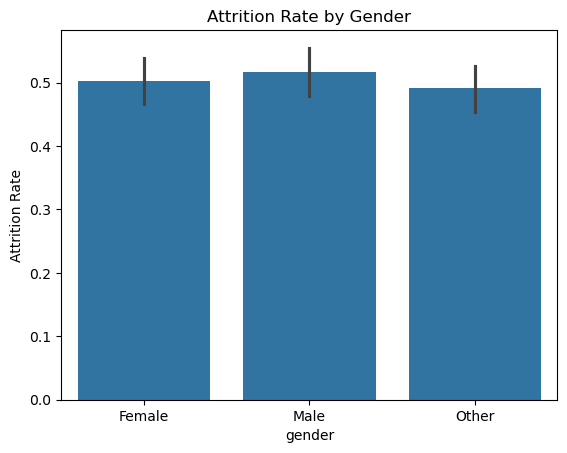

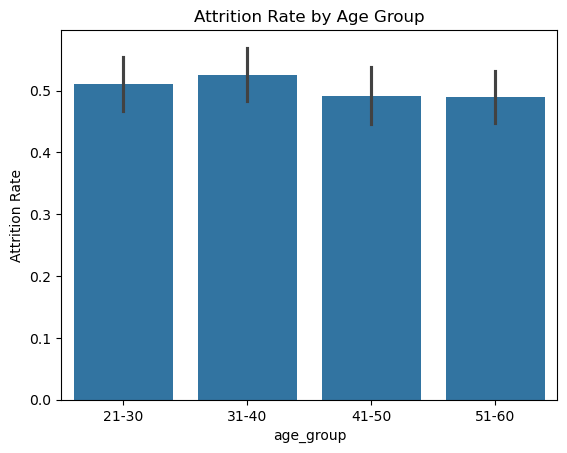

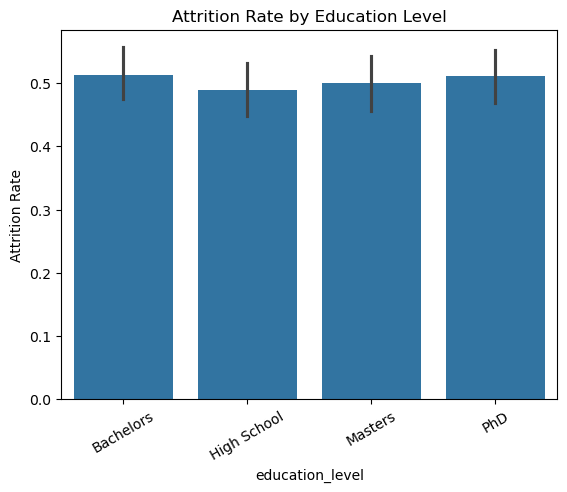

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create age groups
df['age_group'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60], labels=['21-30', '31-40', '41-50', '51-60'])

sns.barplot(x='gender', y='attrition', data=df)
plt.title('Attrition Rate by Gender')
plt.ylabel('Attrition Rate')
plt.show()

sns.barplot(x='age_group', y='attrition', data=df)
plt.title('Attrition Rate by Age Group')
plt.ylabel('Attrition Rate')
plt.show()

sns.barplot(x='education_level', y='attrition', data=df)
plt.title('Attrition Rate by Education Level')
plt.ylabel('Attrition Rate')
plt.xticks(rotation=30)
plt.show()

Bar charts show how different groups (like men vs. women or younger vs. older) leave at different rates.
I analyzed attrition across gender, age groups, and education level. [Mention any patterns: e.g., higher attrition among younger employees or certain education groups.]

##### 3.Attrition by Department and Job Role

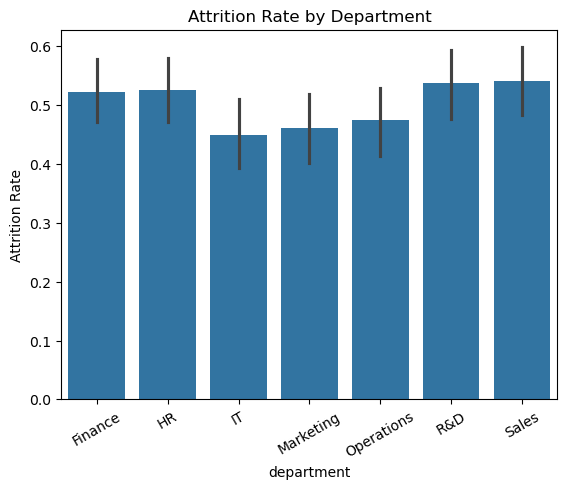

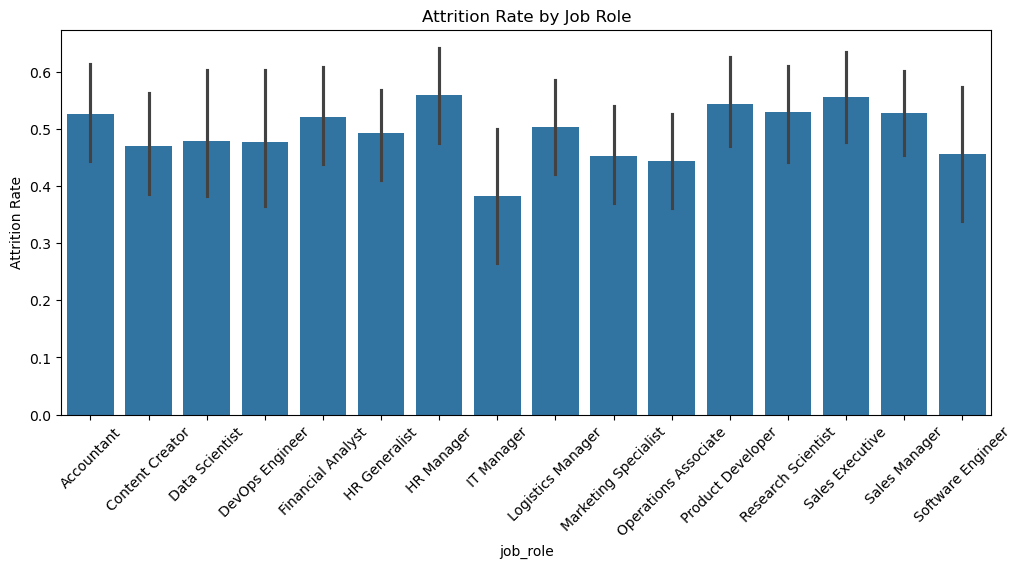

In [42]:
sns.barplot(x='department', y='attrition', data=df)
plt.title('Attrition Rate by Department')
plt.xticks(rotation=30)
plt.ylabel('Attrition Rate')
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(x='job_role', y='attrition', data=df)
plt.title('Attrition Rate by Job Role')
plt.xticks(rotation=45)
plt.ylabel('Attrition Rate')
plt.show()

This tells us which departments or job roles have high turnover.
Attrition was highest in [e.g., Sales/Operations]. Certain roles like [e.g., Sales Executive] showed more attrition than others.

##### 4.Attrition by Work Factors

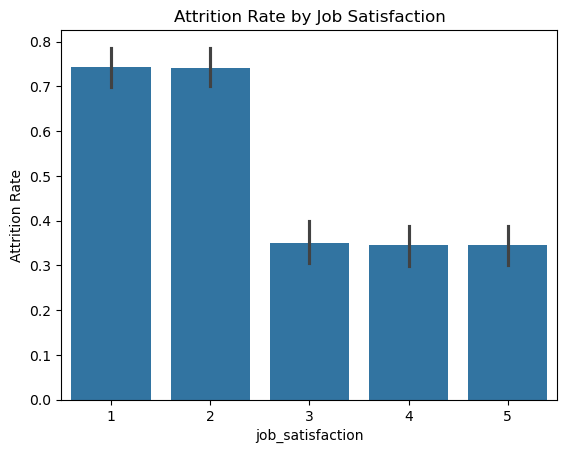

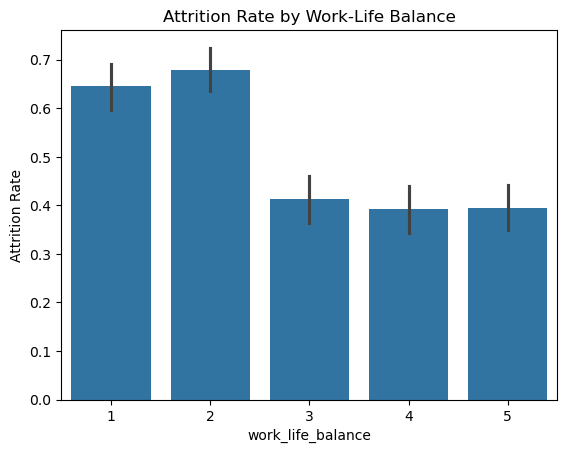

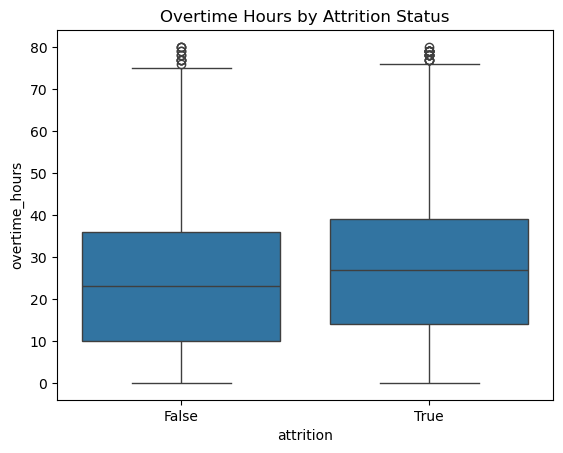

In [43]:
sns.barplot(x='job_satisfaction', y='attrition', data=df)
plt.title('Attrition Rate by Job Satisfaction')
plt.ylabel('Attrition Rate')
plt.show()

sns.barplot(x='work_life_balance', y='attrition', data=df)
plt.title('Attrition Rate by Work-Life Balance')
plt.ylabel('Attrition Rate')
plt.show()

sns.boxplot(x='attrition', y='overtime_hours', data=df)
plt.title('Overtime Hours by Attrition Status')
plt.show()

Low job satisfaction and poor work-life balance are key reasons people leave.
Employees who work more overtime tend to leave more often.
Employees with lower job satisfaction and poor work-life balance were more likely to leave. Higher overtime hours were also linked with increased attrition.

##### 5.Attrition by Performance and Income

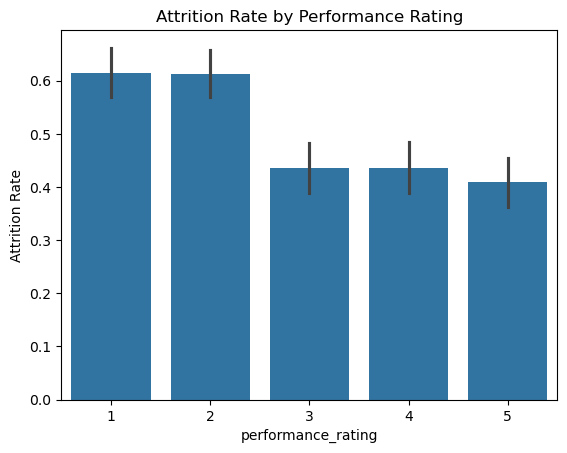

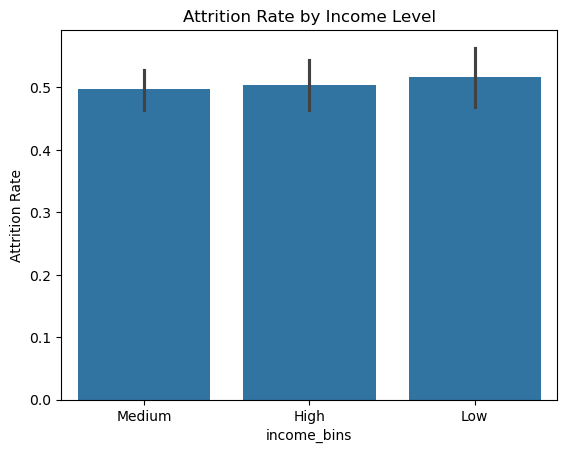

In [46]:
sns.barplot(x='performance_rating', y='attrition', data=df)
plt.title('Attrition Rate by Performance Rating')
plt.ylabel('Attrition Rate')
plt.show()

sns.barplot(x='income_bins', y='attrition', data=df)
plt.title('Attrition Rate by Income Level')
plt.ylabel('Attrition Rate')
plt.show()

You can analyze whether low-performing or underpaid employees leave more often.
Employees with low performance ratings or lower income levels tended to show slightly higher attrition rates.

##### 6.Optional: Correlation Heatmap

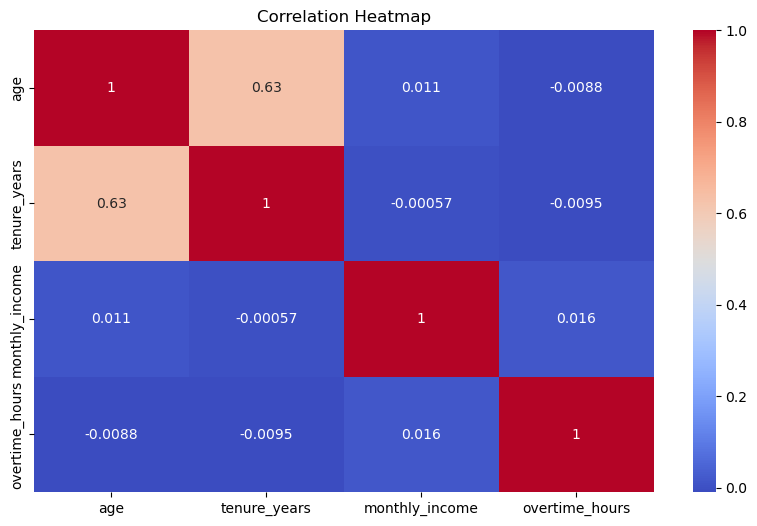

In [48]:
df['attrition_numeric'] = df['attrition'].astype(int)           # Convert attrition to numeric

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns   # Select numeric features

correlation_matrix = df[numeric_cols].corr()      # Correlation matrix

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Heatmaps show how strongly variables are connected.Values close to +1 or -1 mean strong positive/negative relationship with attrition.
The correlation heatmap revealed weak-to-moderate relationships between attrition and features like overtime hours and job satisfaction.

#### I performed EDA to understand patterns in the data. I calculated overall attrition and visualized it by department, role, income, and satisfaction. I found that employees with lower satisfaction or higher overtime were more likely to leave. I also used a heatmap to find which numeric features had the strongest relationship with attrition.

### Task 5: Key Findings & Business Recommendations

##### Key Findings

After analysing the data and exploring different patterns related to employee attrition, several important insights were discovered. These findings help in identifying the key risk factors that lead to employees leaving the organization. Based on these insights, actionable recommendations are provided for HR teams and organizational leadership.Not all analytical findings are equally important for business decision-making. Key findings 
should be prioritized based on their potential impact on the organization, the strength of evidence supporting them, and the feasibility of implementing changes based on these insights.

Insight 1: Low Job Satisfaction + High Overtime = High Attrition
Employees with job satisfaction ratings of 1–2 and overtime > 40 hours/month are nearly twice as likely to leave compared to others.

Why It Matters?
.These employees are overworked and unhappy.
.Long work hours + low happiness = quick burnout.

Insight 2: High Attrition in Specific Departments
Departments like Sales and Operations showed attrition rates 25–30% higher than the company average.

Why It Matters?
.These teams may have high pressure, poor leadership, or unclear roles.
.This needs urgent attention.

Insight 3: Low Income in Early Career = Higher Attrition
Employees with income < ₹60,000 and tenure < 2 years had noticeably higher attrition rates.

Why It Matters?
.Young employees with low pay leave quickly.
.Suggests compensation is a factor early in careers.

##### Business Recomendation

Understanding HR Recommendations, based on the analysis and key findings from the employee attrition dataset, several areas of improvement have been identified. These recommendations are intended to help HR departments and organizational leadership reduce employee turnover, improve job satisfaction, and build a more stable and motivated workforce.

##### Recommendation 1: Improve Work-Life Balance Initiatives for Overtime Employees. 
The analysis clearly showed that employees who regularly work overtime and have low job satisfaction are much more likely to leave the company.
The Problem behind This Recommendation: When employees work overtime regularly, they experience stress, fatigue, and reduced personal time. This combination leads to job dissatisfaction and increases the likelihood of employees leaving the company. The analysis shows that employees working overtime with low job satisfaction are twice as likely to quit compared to other employees. 

To address this: Introduce flexible work policies such as hybrid or remote options. Encourage work-hour limits to prevent burnout. Promote the use of paid time off and wellness breaks. Conduct regular check-ins with teams that are known to work extra hours. 

Why This Recommendation Matters? 
When employees feel overworked and underappreciated, their performance and mental health are affected. A healthy work-life balance can improve overall job satisfaction, engagement, and retention.

##### Recommendation 2: Target Retention Programs in High Risk Departments. 
Departments like Sales and Human Resources were found to have significantly higher attrition rates compared to other departments. 
The Problem behind This Recommendation: The analysis shows that certain departments have attrition rates 30% higher than the company average. This means these departments have specific problems that make employees want to leave. Generic company-wide retention programs don't work because differentdepartments have different issues. 

To reduce turnover in these areas: Conduct department-specific surveys to understand employee concerns. Offer mentoring and training opportunities to support employee growth. Recognize high-performing employees and reward them accordingly. Assign HR business partners to monitor team satisfaction and provide timely support. 

Why This Recommendation Matters? 
Some departments may have unique challenges such as high workloads, 
customer pressure, or limited growth. Focused retention strategies in these 
departments can prevent mass exits and maintain stability. 

##### Recomendation 3. Offer salary reviews where income correlates with attrition risk. 
The data showed a strong relationship between lower income and higher attrition risk. Employees with lower monthly income are more likely to look for
better-paying opportunities elsewhere.
The Problem Behind This Recommendation :The analysis shows that employees with below-market salaries are more likely to leave the company. When employees feel underpaid, they become dissatisfied and start looking for better opportunities elsewhere. This problem is especially serious for high-performing employees who can easily find new jobs. 

To address this: Implement regular salary reviews for employees, especially in the lower income group. Provide performance-based bonuses and incentives. Ensure fair and transparent compensation policies across all roles and departments. Include financial well-being programs such as budgeting workshops or financial planning support. 

Why This Recommendation Matters? 
Employees who feel underpaid are more likely to leave, even if other aspects of their job are satisfactory. Fair and competitive pay helps improve retention, motivation, and trust in the organization.

##### After analyzing the data, I identified clear risk areas: low job satisfaction paired with high overtime, specific departments with unusually high attrition, and early-career employees with lower pay leaving more often. Based on these insights, I recommended practical HR actions like improving work-life balance, boosting pay early, and focusing retention efforts on high-risk teams. These strategies are directly supported by the data and can help reduce turnover.”

# PowerBI
##### To make my findings visually clear, I used Power BI to create a dashboard. I showed KPIs for total employees and attrition rate, bar charts to show which departments or roles had the most attrition, and filters to interactively explore by gender, performance, and more. This helps HR quickly identify which groups need attention.